<a href="https://colab.research.google.com/github/Gus-1003/TADS_Projeto_PalmaS/blob/main/ExperimentoCirculosBrancos/test2_professor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bibliotecas e ferramentas:

In [1]:
from google.colab import drive

import numpy as np # Manipulação de matrizes

import pandas as pd # Manipulação de dados
import matplotlib.pyplot as plt # Mostrar imagens e graficos

import cv2 #OpenCV - Manipulação da Imagem
from google.colab.patches import cv2_imshow

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

In [2]:
drive.mount('/content/drive')
Img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/fig_control_1.jpg")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Imagem:

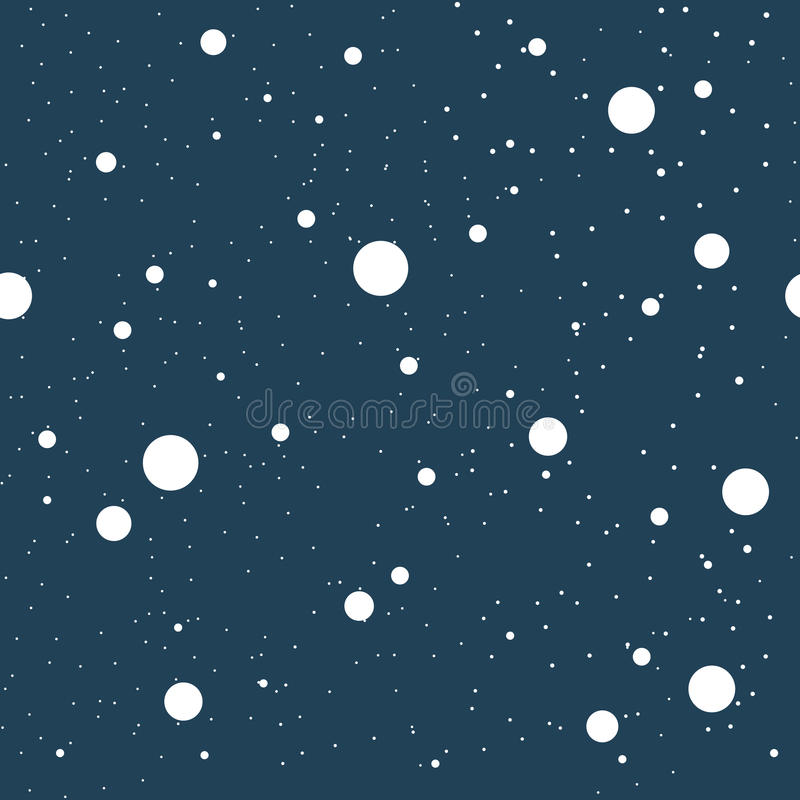

In [3]:
# Using cv2.imshow() method 
# Displaying the image 
cv2_imshow(Img)

In [4]:
# channels B, G, R (0, 1, 2)
def scatter3d():
    r, g, b = cv.split(rgbImg)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    
    pixel_colors = rgbImg.reshape((np.shape(rgbImg)[0]*np.shape(rgbImg)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()
    
    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.show()

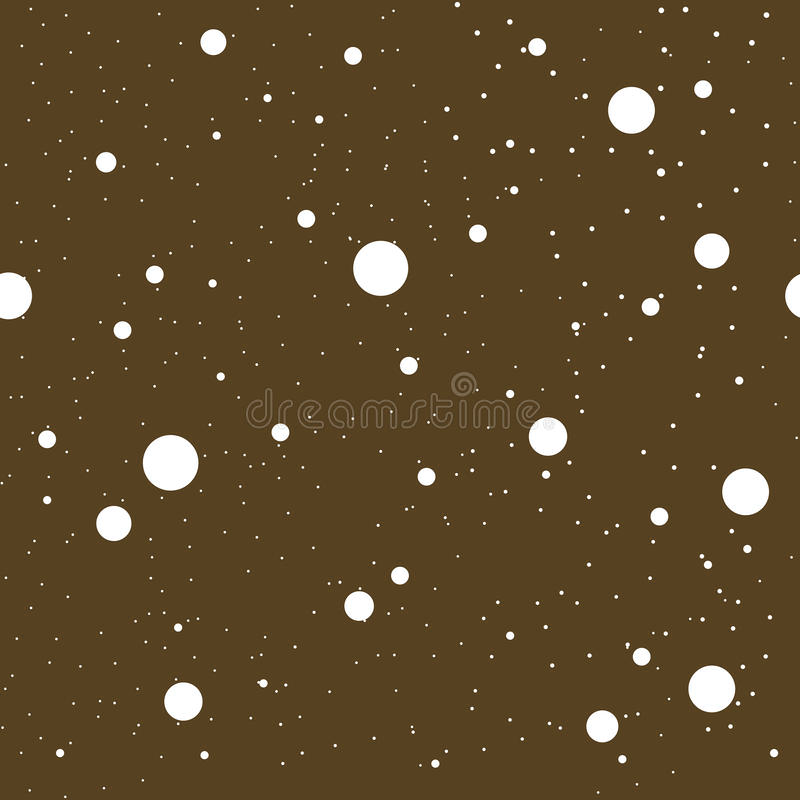

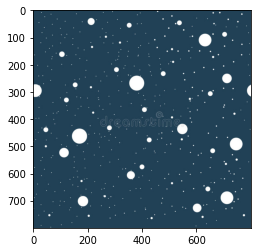

In [5]:
#bgrImg = cv2.imread('amostra1.jpeg')
rgbImg = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgbImg)
plt.imshow(rgbImg)

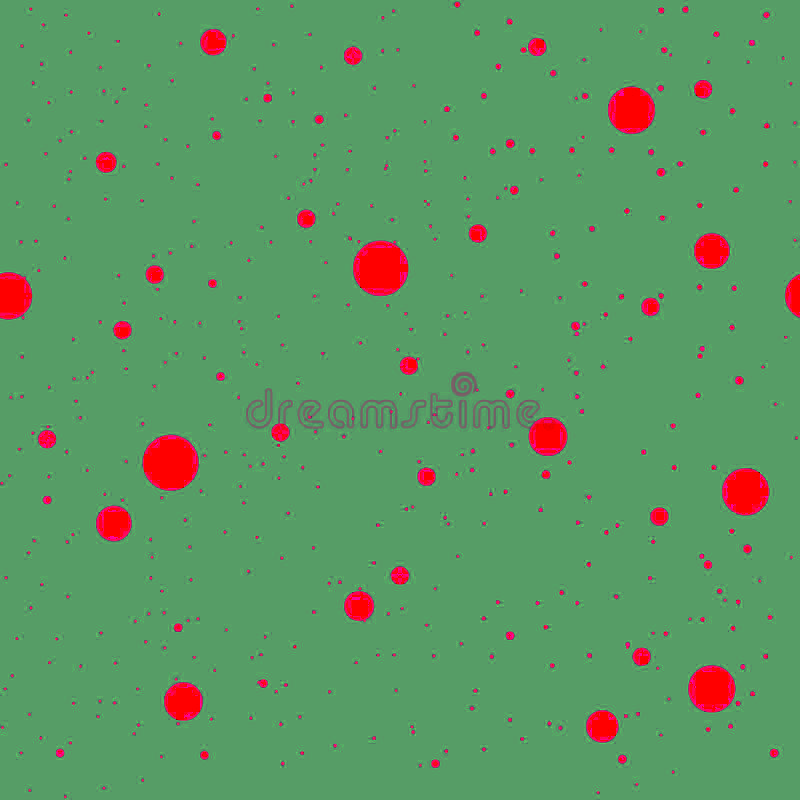

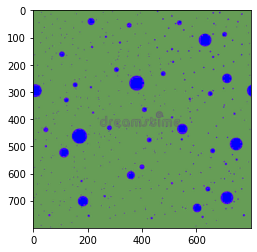

In [6]:
# HUE, SATURATION, VALUE (BRIGHTNESS) - better to segment by color
# value from 0 dark to light at the top
# lower s - more gray, higher s, more pure
# hue tonality, shade 0 to 360 13 values
hsvImg = cv2.cvtColor(rgbImg, cv2.COLOR_RGB2HSV)
cv2_imshow(hsvImg)
plt.imshow(hsvImg)
plt.show()

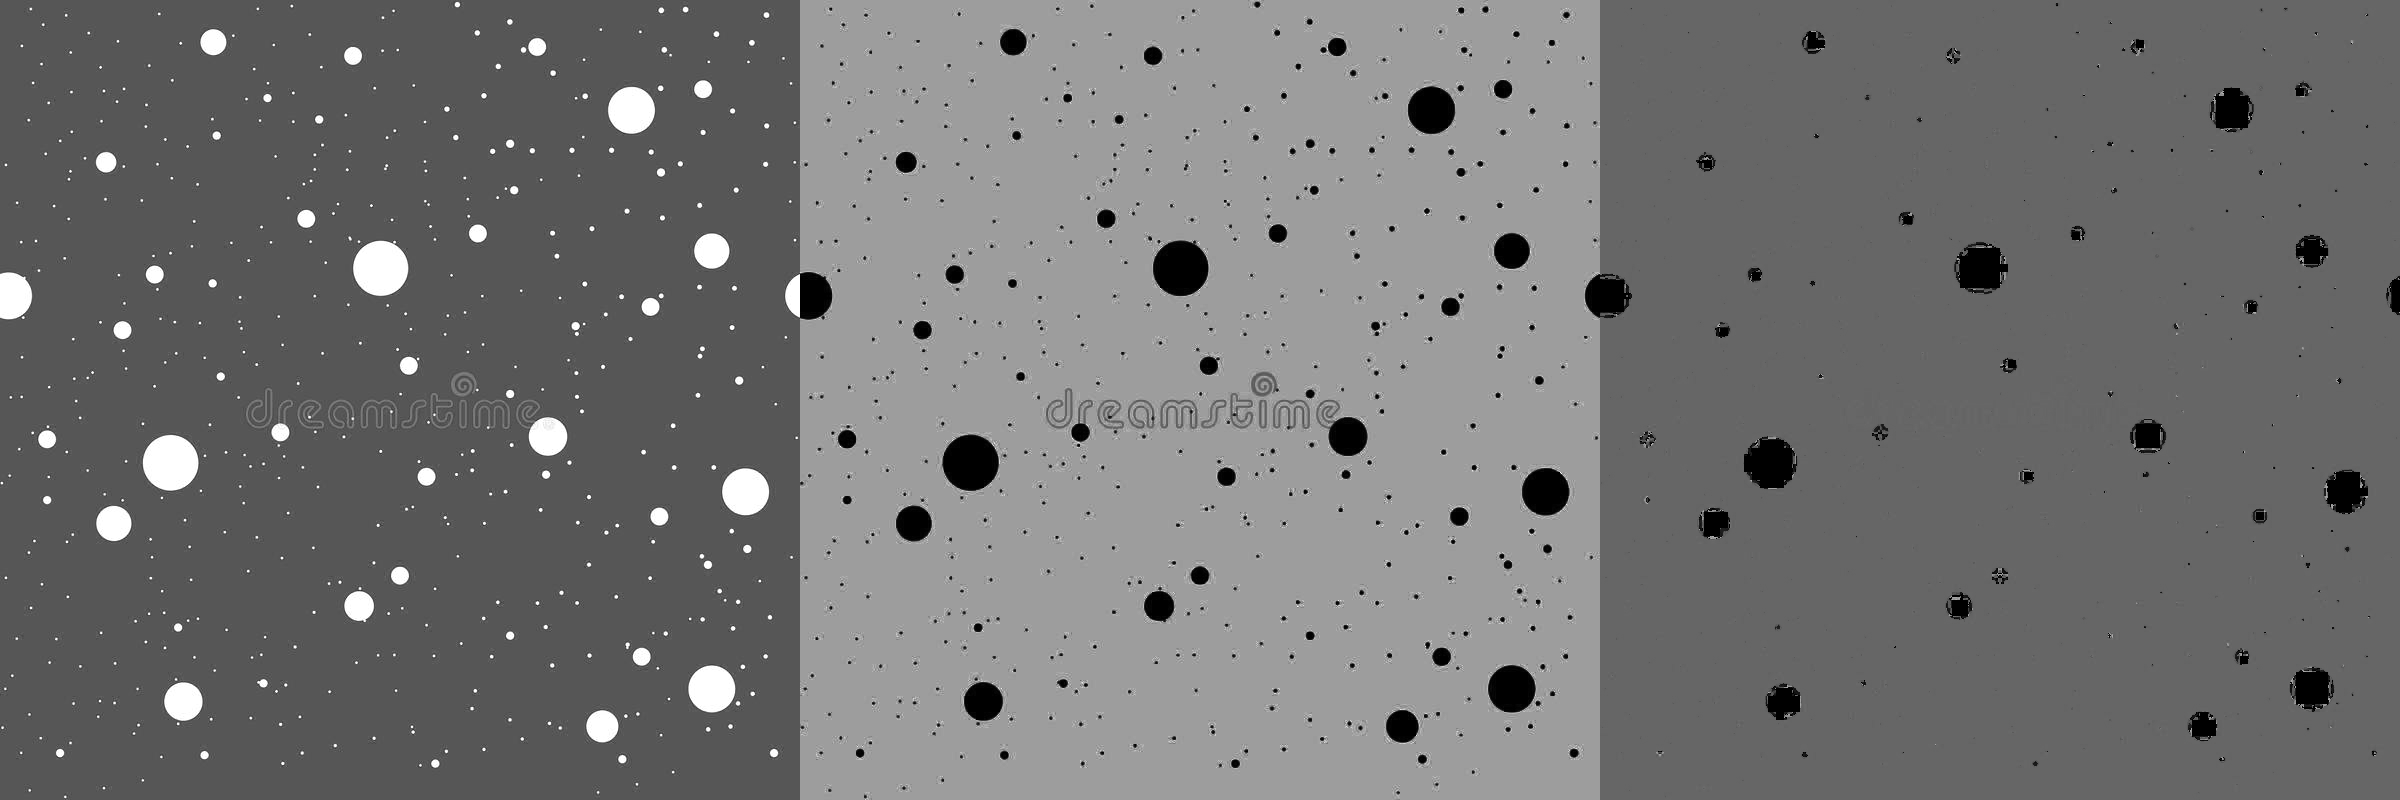

In [7]:
(V, S, H) = cv2.split(hsvImg) #Split = Método para a divisão da imagem nos 3 canais de intensidade
cv2_imshow(cv2.hconcat([H, S, V])) #hconcat = Concatena imagens Horizontalmente

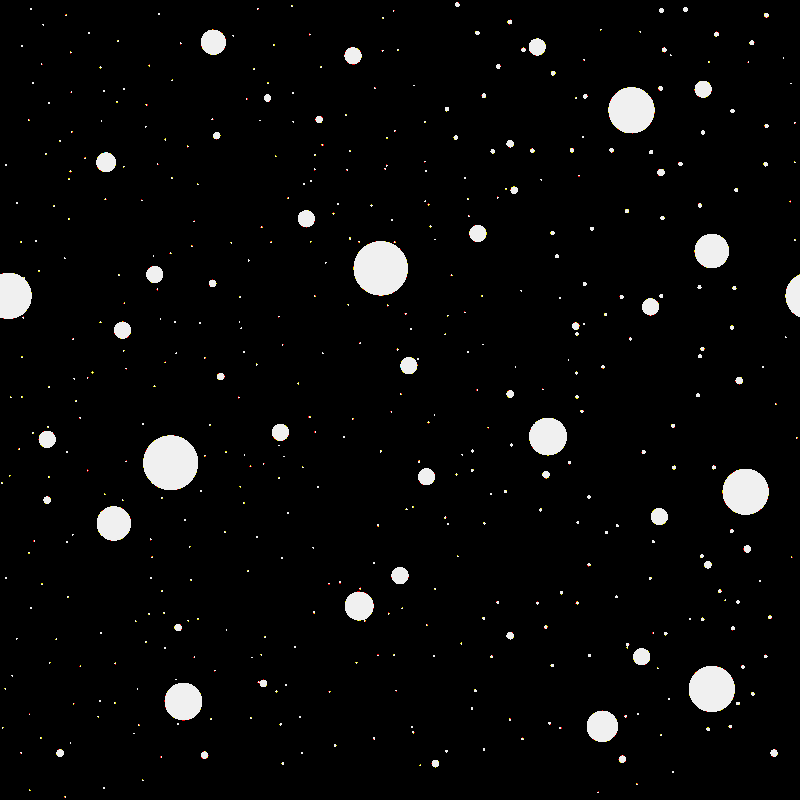

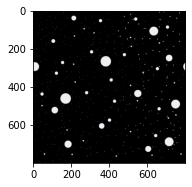

In [21]:
r1 = (240, 100, 100)
r2 = (240, 100, 78)

# mask = cv2.inRange(hsvImg, r2, r1)
mask = cv2.inRange(rgbImg, r2, r1)

# ret, mask = cv2.threshold(hsvImg, 200, 240, cv2.THRESH_BINARY)
ret, mask = cv2.threshold(rgbImg, 200, 240, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

plt.subplot(1, 2, 1)
cv2_imshow(mask)
plt.imshow(mask, cmap='gray')
plt.show()

In [20]:
print(mask.shape)

(800, 800, 3)


In [19]:
print(rgbImg.shape)

(800, 800, 3)


In [18]:
print(hsvImg.shape)

(800, 800, 3)


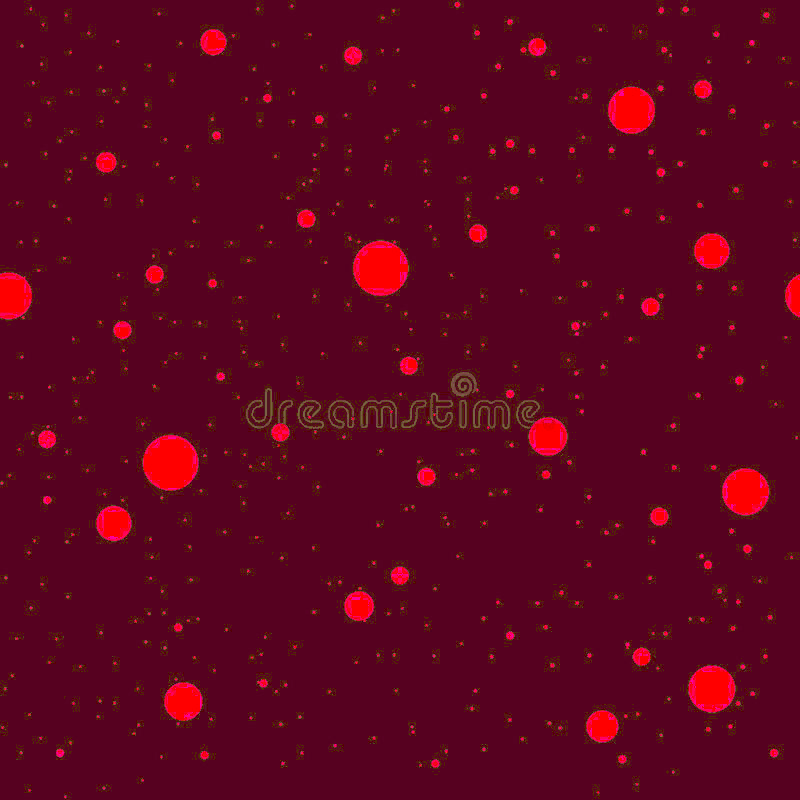

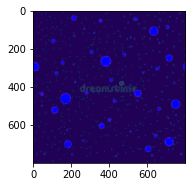

In [25]:
result = cv2.bitwise_and (rgbImg, hsvImg)
plt.subplot(1, 2, 2)
cv2_imshow(result)
plt.imshow(result)
plt.show()

In [26]:
# # Combine the two masks
#     final_mask = mask + mask_white
#     result = cv2.bitwise_and(image, image, mask=final_mask)

#     # Clean up the segmentation using a blur
#     blur = cv2.GaussianBlur(result, (7, 7), 0)
#     return blur


# scatter plot HSV
# fig = plt.figure()
# axis = fig.add_subplot(1, 1, 1, projection="3d")

# pixel_colors = hsvImg.reshape((np.shape(hsvImg)[0]*np.shape(hsvImg)[1], 3))
# norm = colors.Normalize(vmin=-1.,vmax=1.)
# norm.autoscale(pixel_colors)
# pixel_colors = norm(pixel_colors).tolist()
    
# axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
# axis.set_xlabel("Hue")
# axis.set_ylabel("Saturation")
# axis.set_zlabel("Value")
# plt.show()
